In [33]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [34]:
dataset = 'hand_landmarks.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [35]:
NUM_CLASSES = 26

# 学習データ読み込み

In [36]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [37]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [40]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 26)                286       
                                                                 
Total params: 1356 (5.30 KB)
Trainable params: 1356 (5.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [42]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [43]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 [>.............................] - ETA: 19s - loss: 3.3307 - accuracy: 0.0391
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 1s 7ms/step - loss: 3.2594 - accuracy: 0.0444 - val_loss: 3.1723 - val_accuracy: 0.0350
Epoch 2/1000
28/29 [===========================>..] - ETA: 0s - loss: 3.1735 - accuracy: 0.0550
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 3.1730 - accuracy: 0.0550 - val_loss: 3.0747 - val_accuracy: 0.0383
Epoch 3/1000
29/29 [==============================] - ETA: 0s - loss: 3.0771 - accuracy: 0.0714

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 3.0771 - accuracy: 0.0714 - val_loss: 2.9279 - val_accuracy: 0.1083
Epoch 4/1000
24/29 [=======================>......] - ETA: 0s - loss: 2.9546 - accuracy: 0.1042
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 2.9409 - accuracy: 0.1069 - val_loss: 2.7413 - val_accuracy: 0.1700
Epoch 5/1000
 1/29 [>.............................] - ETA: 0s - loss: 2.9086 - accuracy: 0.1328
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 2.7745 - accuracy: 0.1400 - val_loss: 2.5325 - val_accuracy: 0.1750
Epoch 6/1000
27/29 [==========================>...] - ETA: 0s - loss: 2.6107 - accuracy: 0.1641
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [=============

In [44]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 1ms/step - loss: 0.1871 - accuracy: 0.9467


In [45]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [46]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 73ms/step
[2.24315336e-30 7.37639977e-22 9.67473090e-01 3.52975680e-03
 1.26655647e-26 3.16703784e-36 5.96981664e-08 6.17221440e-06
 1.06950525e-11 1.32921735e-37 9.25204182e-30 2.28690743e-37
 2.98563341e-10 5.12749350e-34 2.89908424e-02 1.61552658e-17
 6.26053232e-14 0.00000000e+00 0.00000000e+00 2.82814342e-17
 0.00000000e+00 7.60010230e-31 0.00000000e+00 4.99402256e-12
 1.62165504e-28 3.20684318e-34]
2


# 混同行列

38/38 [==============================] - 0s 813us/step


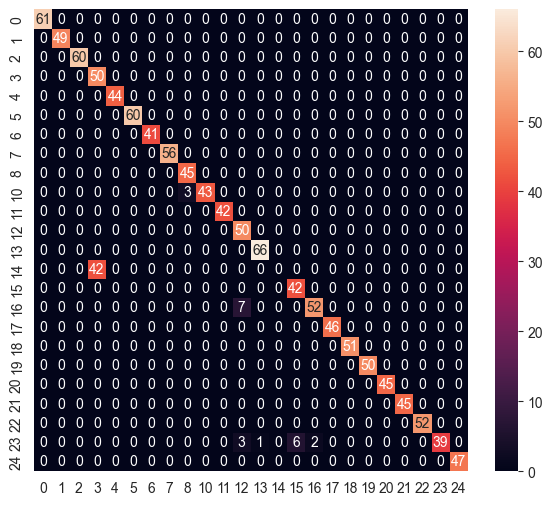

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        60
           3       0.54      1.00      0.70        50
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        56
           8       0.94      1.00      0.97        45
          10       1.00      0.93      0.97        46
          11       1.00      1.00      1.00        42
          12       0.83      1.00      0.91        50
          13       0.99      1.00      0.99        66
          14       0.00      0.00      0.00        42
          15       0.88      1.00      0.93        42
          16       0.96      0.88      0.92        59
          17       1.00      1.00      1.00        46
     

C:\gesture_recognition_by_image\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\gesture_recognition_by_image\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\gesture_recognition_by_image\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [48]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmp1a856e6x\assets


INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmp1a856e6x\assets


7540

# 推論テスト

In [50]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [51]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [52]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [53]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [54]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.2431699e-30 7.3764548e-22 9.6747309e-01 3.5297433e-03 1.2665611e-26
 3.1670612e-36 5.9698280e-08 6.1722317e-06 1.0695072e-11 1.3292373e-37
 9.2521817e-30 2.2869420e-37 2.9856442e-10 5.1275711e-34 2.8990787e-02
 1.6155388e-17 6.2605798e-14 0.0000000e+00 0.0000000e+00 2.8281540e-17
 0.0000000e+00 7.6002170e-31 0.0000000e+00 4.9940698e-12 1.6216733e-28
 3.2068425e-34]
2
